In [40]:
from qiskit import QuantumCircuit, transpile,QuantumRegister,ClassicalRegister
from qiskit_aer import Aer,AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

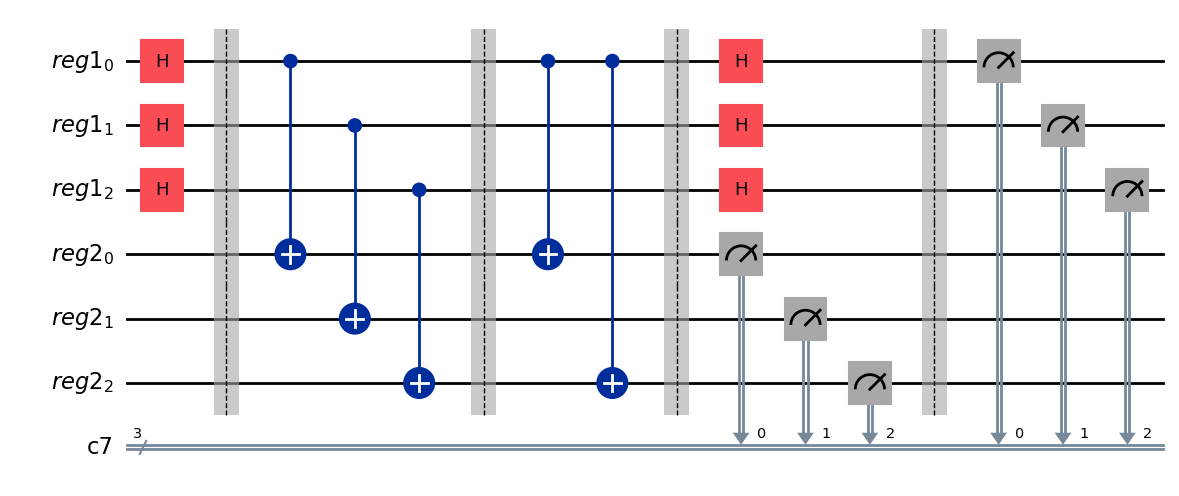

In [54]:
# Define the secret bit string
b = '101'
n = len(b)

# Create two quantum registers of 'n' qubits and 1 classical register of 'n' bits
q_reg1 = QuantumRegister(n, 'reg1')
q_reg2 = QuantumRegister(n, 'reg2')
c_reg = ClassicalRegister(n)
circuit = QuantumCircuit(q_reg1, q_reg2, c_reg)

# Apply H-gates to the qubits of the first register (put them in superposition)
circuit.h(q_reg1)
circuit.barrier()

circuit.cx(q_reg1, q_reg2)
circuit.barrier()
# Apply the oracle, which in this case involves XORing with the secret bit string
# The oracle should represent the secret string '101'
circuit.cx(q_reg1[0], q_reg2[0])  # First bit of secret string (1)
circuit.cx(q_reg1[0], q_reg2[2])  # Third bit of secret string (1)

circuit.barrier()
circuit.measure(q_reg2,c_reg)
# Apply Hadamard gates again to the qubits in the first register
circuit.h(q_reg1)

# Barrier for clarity (optional)
circuit.barrier()

# Measure the first register (we are not measuring the second register in Simon's algorithm)
circuit.measure(q_reg1, c_reg)

# Draw the circuit
circuit.draw('mpl')

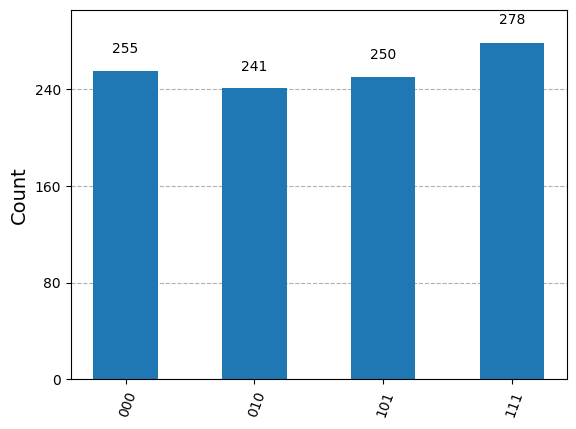

In [55]:
# Use AerSimulator to run the circuit
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get and plot the measurement counts
counts = result.get_counts(circuit)
plot_histogram(counts)

In [56]:
results = list(counts.keys())
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

# Iterate over results and print the dot product mod 2
for z in results:
    print(f'{b}.{z} = {bdotz(b, z)} (mod 2)')

101.000 = 0 (mod 2)
101.101 = 0 (mod 2)
101.010 = 0 (mod 2)
101.111 = 0 (mod 2)
